In [2]:
import numpy as np
import random as rd

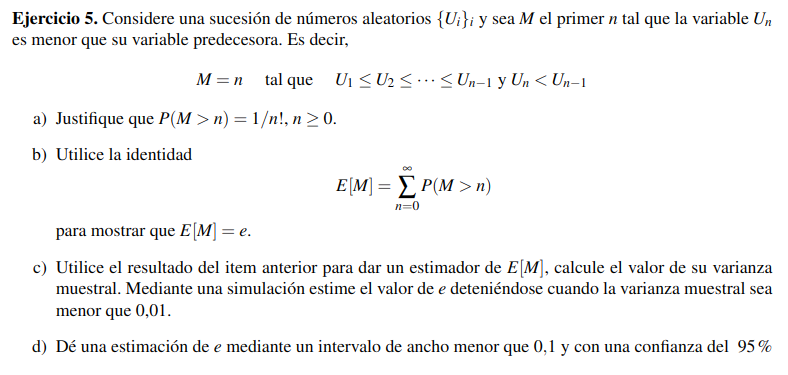

$$
M = n \; \text{tal que } \; U_1 \leq U_2 \leq \ldots \leq U_n \; \text{y} \; U_n \lt U_{n+1} \\

P(M \gt n) \; \text{Significa que quiero que la secuencia}\; U_1, U_2 , \ldots, U_n \;\text{este ordenada.}\\
\text{como hay n! permutaciones, entonces la probabilidad de que la secuencia este ordenada es}\\ \frac{1}{n!} \\
\cdots
$$

$$
\begin{align*}
E[M] = \sum_{n=0}^{\infty} P(M \gt n) = \sum_{n=0}^{\infty} \frac{1}{n!} \\
\text{La serie de taylor de}\; e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!} \\
\text{Con x = 1} \; e^1 = \sum_{n=0}^{\infty} \frac{1}{n!} \\
\text{Entonces } E[M] = e
\end{align*}
$$

In [3]:
def gen_M():
    n = 1
    u = rd.random()
    old_u = u
    while u >= old_u:
        old_u = u
        u = rd.random()
        n += 1
    return n

In [4]:
def media_muestral(d):
    media = gen_M()
    scuad = 0
    n = 1
    while n <= 100 or np.sqrt(scuad/n) > d:
        n += 1
        X = gen_M()
        mediaAnt = media
        media = mediaAnt + (X - mediaAnt)/n
        scuad = (1 - 1/(n-1)) * scuad + n*(media - mediaAnt)**2

    return round(media, 4), round(scuad, 4)

In [123]:
media_muestral(0.01)

(2.7187, 0.7621)

In [57]:
def intervalo_media(z_alfa_2, L):
    'Confianza = 1 - alfa, ampliud del intervalo = L'
    d = L/(2*z_alfa_2)
    media = gen_M()
    scuad = 0
    n = 1
    while n <= 100 or np.sqrt(scuad/n) > d:
        n += 1
        X = gen_M()
        mediaAnt = media
        media = mediaAnt + (X - mediaAnt) / n
        scuad = (1 - 1/(n-1)) * scuad + n*(media - mediaAnt)**2
    IC_inf = media - z_alfa_2 * np.sqrt(scuad/n)
    IC_sup = media + z_alfa_2 * np.sqrt(scuad/n)
    return round(media,4), round(scuad, 4), (round(IC_inf, 4), round(IC_sup, 4))

In [116]:
intervalo_media(1.96,0.1)

(2.7093, 0.7518, (2.6594, 2.7593))